<a href="https://colab.research.google.com/github/vrund-patel-contact/Calorie-Expenditure-Prediction-Model/blob/main/Calorie_Expenditure_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install the necessary libraries/modules/frameworks:

In [1]:
!pip install numpy --quiet
!pip install pandas --quiet
!pip install scikit-learn --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install plotly --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 2: Upload the dataset:

In [3]:
Dataset = files.upload()

Saving gym_members_exercise_tracking.csv to gym_members_exercise_tracking.csv


In [4]:
Dataframe = pd.read_csv("gym_members_exercise_tracking.csv")

# Step 3: View the dataset and remove the categories that have a low correlation value:


In [5]:
Dataframe.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [25]:
df = pd.get_dummies(data = Dataframe , columns = ["Gender" , "Workout_Type"] , drop_first = False)

In [26]:
df.corr()["Calories_Burned"] # Note: if you have string values, you have to do: df.corr(numeric_only = True)["Calories_Burned"]. This will exclude the columns with string values.

,Calories_Burned
Age,-0.154679
Weight (kg),0.095443
Height (m),0.086348
Max_BPM,0.002090
Avg_BPM,0.339659
Resting_BPM,0.016518
Session_Duration (hours),0.908140
Calories_Burned,1.000000
Fat_Percentage,-0.597615
Water_Intake (liters),0.356931


In [27]:
df = df.drop(["Age" ,
              "Weight (kg)" ,
              "Height (m)" ,
              "Max_BPM" ,
              "Avg_BPM",
              "Resting_BPM" ,
              "Water_Intake (liters)" ,
              "BMI" ,
              "Gender_Female" ,
              "Gender_Male" ,
              "Workout_Type_Cardio" ,
              "Workout_Type_HIIT" ,
              "Workout_Type_Strength" ,
              "Workout_Type_Yoga"] , axis = 1)

In [28]:
df.head()

,Session_Duration (hours),Calories_Burned,Fat_Percentage,Workout_Frequency (days/week),Experience_Level
0,1.69,1313.0,12.6,4,3
1,1.30,883.0,33.9,4,2
2,1.11,677.0,33.4,4,2
3,0.59,532.0,28.8,3,1
4,0.64,556.0,29.2,3,1


In [29]:
final_df = df[["Session_Duration (hours)" , "Fat_Percentage" , "Workout_Frequency (days/week)" , "Experience_Level" , "Calories_Burned"]]

In [30]:
final_df.head()

,Session_Duration (hours),Fat_Percentage,Workout_Frequency (days/week),Experience_Level,Calories_Burned
0,1.69,12.6,4,3,1313.0
1,1.30,33.9,4,2,883.0
2,1.11,33.4,4,2,677.0
3,0.59,28.8,3,1,532.0
4,0.64,29.2,3,1,556.0


# Step 4: Analyze the dataset's properties:

In [31]:
final_df.dtypes

,0
Session_Duration (hours),float64
Fat_Percentage,float64
Workout_Frequency (days/week),int64
Experience_Level,int64
Calories_Burned,float64


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Session_Duration (hours)       973 non-null    float64
 1   Fat_Percentage                 973 non-null    float64
 2   Workout_Frequency (days/week)  973 non-null    int64  
 3   Experience_Level               973 non-null    int64  
 4   Calories_Burned                973 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 38.1 KB


In [33]:
final_df.describe()

,Session_Duration (hours),Fat_Percentage,Workout_Frequency (days/week),Experience_Level,Calories_Burned
count,973.000000,973.000000,973.000000,973.000000,973.000000
mean,1.256423,24.976773,3.321686,1.809866,905.422405
std,0.343033,6.259419,0.913047,0.739693,272.641516
min,0.500000,10.000000,2.000000,1.000000,303.000000
25%,1.040000,21.300000,3.000000,1.000000,720.000000
50%,1.260000,26.200000,3.000000,2.000000,893.000000
75%,1.460000,29.300000,4.000000,2.000000,1076.000000
max,2.000000,35.000000,5.000000,3.000000,1783.000000


# Step 5: Visualize the data:

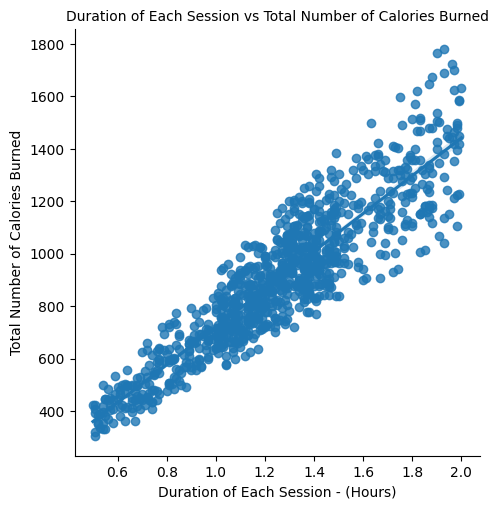

In [34]:
sns.lmplot(x = "Session_Duration (hours)" , y = "Calories_Burned" , data = final_df)
plt.title("Duration of Each Session vs Total Number of Calories Burned" , fontsize = 10)
plt.xlabel("Duration of Each Session - (Hours)")
plt.ylabel("Total Number of Calories Burned")
plt.show()

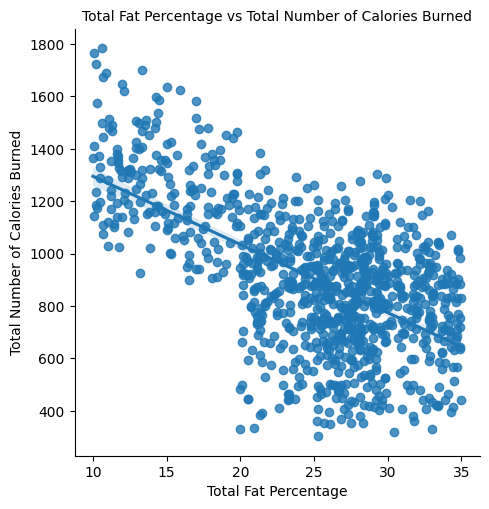

In [35]:
sns.lmplot(x = "Fat_Percentage" , y = "Calories_Burned" , data = final_df)
plt.title("Total Fat Percentage vs Total Number of Calories Burned" , fontsize = 10)
plt.xlabel("Total Fat Percentage")
plt.ylabel("Total Number of Calories Burned")
plt.show()

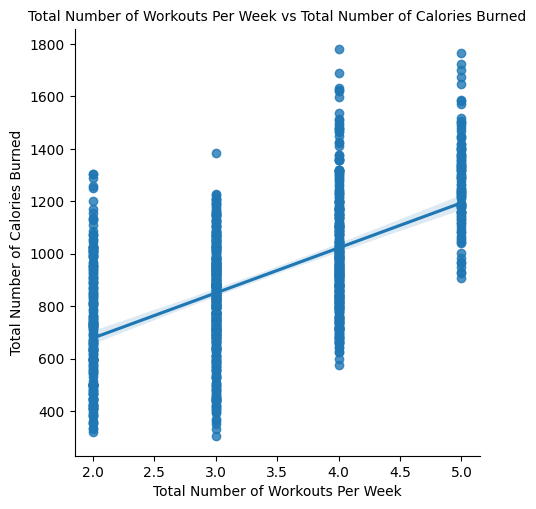

In [36]:
sns.lmplot(x = "Workout_Frequency (days/week)" , y = "Calories_Burned" , data = final_df)
plt.title("Total Number of Workouts Per Week vs Total Number of Calories Burned" , fontsize = 10)
plt.xlabel("Total Number of Workouts Per Week")
plt.ylabel("Total Number of Calories Burned")
plt.show()

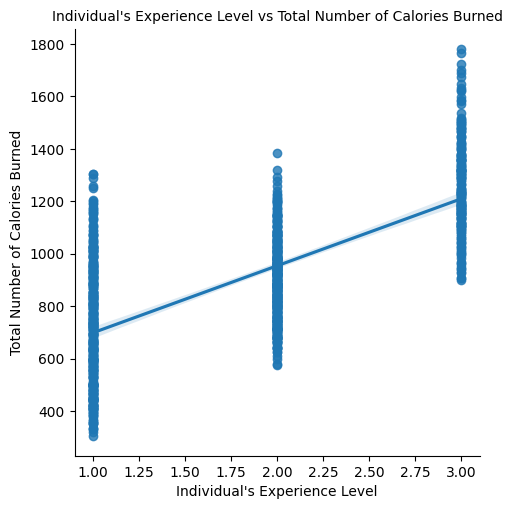

In [37]:
sns.lmplot(x = "Experience_Level" , y = "Calories_Burned" , data = final_df)
plt.title("Individual's Experience Level vs Total Number of Calories Burned" , fontsize = 10)
plt.xlabel("Individual's Experience Level")
plt.ylabel("Total Number of Calories Burned")
plt.show()

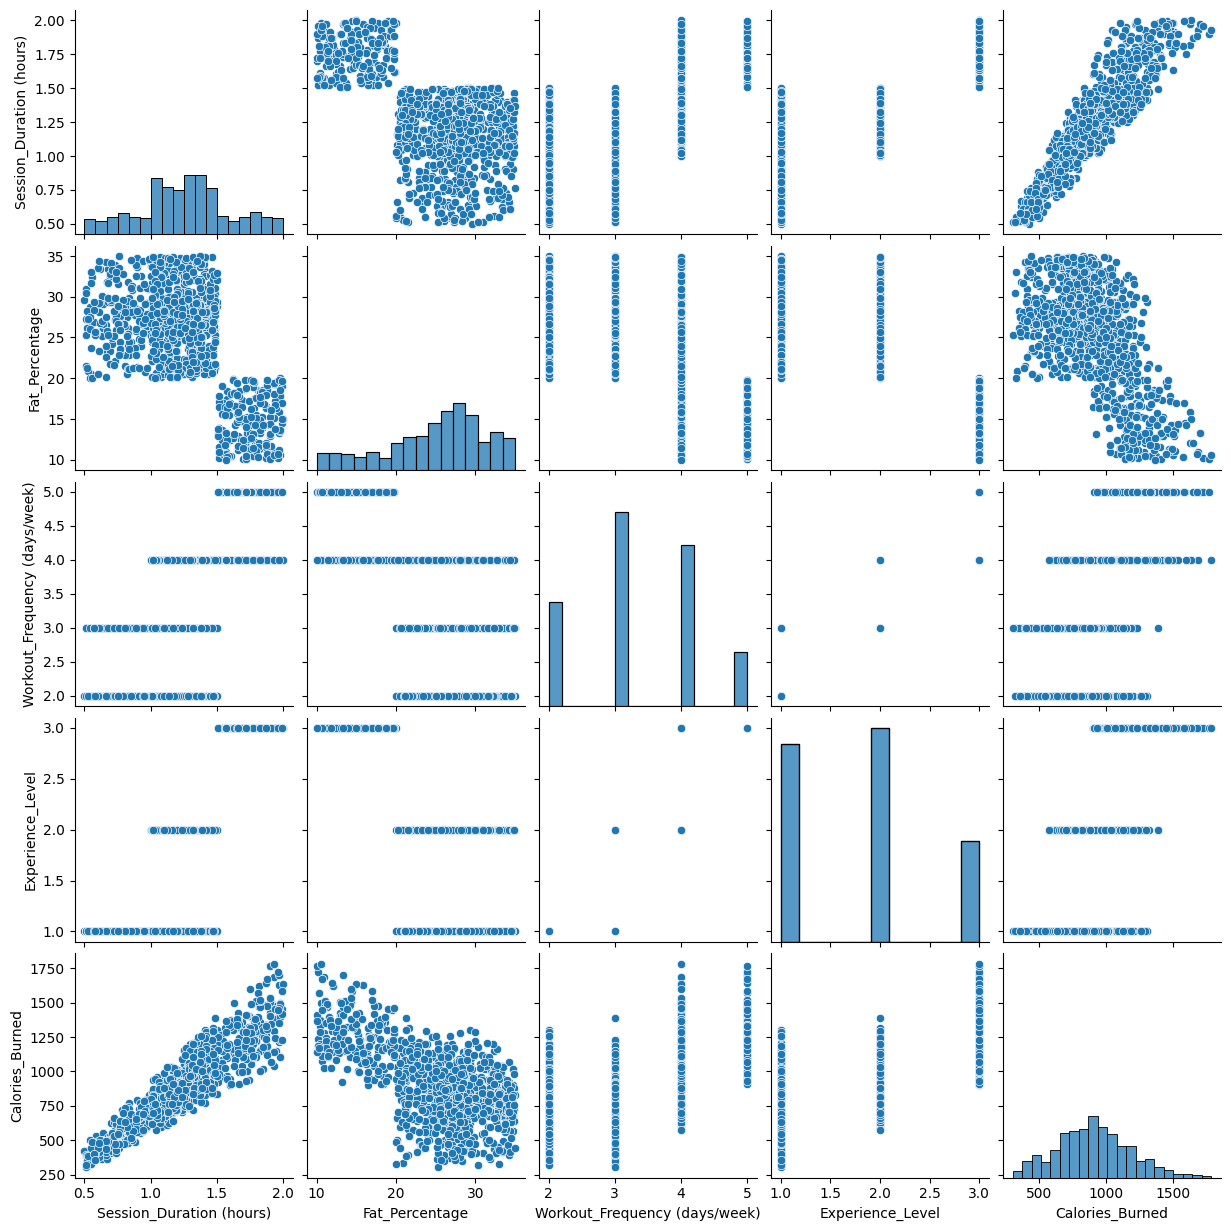

In [38]:
sns.pairplot(data = final_df)
plt.show()

# Step 6: Assign the training/testing variables:

In [39]:
x = final_df.drop("Calories_Burned" , axis = 1)
y = final_df[["Calories_Burned"]]

print(x.shape)
print(y.shape)

(973, 4)
(973, 1)


In [40]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 50)

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(778, 4) (778, 1)
(195, 4) (195, 1)


# Step 7: Train the Linear Regression Model:

In [41]:
from sklearn.linear_model import LinearRegression

LR_Model = LinearRegression()

LR_Model.fit(x_train , y_train)

LinearRegression()

In [42]:
Models_prediction_values_for_y = LR_Model.predict(x_test)

# Step 8: Evaluate and compare the model's predictive values with the actual values:

In [43]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

R_Squared_Score = r2_score(y_test , Models_prediction_values_for_y)
Mean_Absolute_Error = mean_absolute_error(y_test , Models_prediction_values_for_y)
Mean_Squared_Error = mean_squared_error(y_test , Models_prediction_values_for_y)
Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)

print(f"R-Squared Score: {R_Squared_Score}")
print(f"Mean Absolute Error: {Mean_Absolute_Error}")
print(f"Mean Squared Error: {Mean_Squared_Error}")
print(f"Root Mean Squared Error: {Root_Mean_Squared_Error}")

R-Squared Score: 0.8249612899095564
Mean Absolute Error: 91.87378462249102
Mean Squared Error: 13703.949202532924
Root Mean Squared Error: 117.06386804874049


# Step 9: Visualize the residual graph:

> This graph will evaluate and compare the model's predictive values with the residual values:



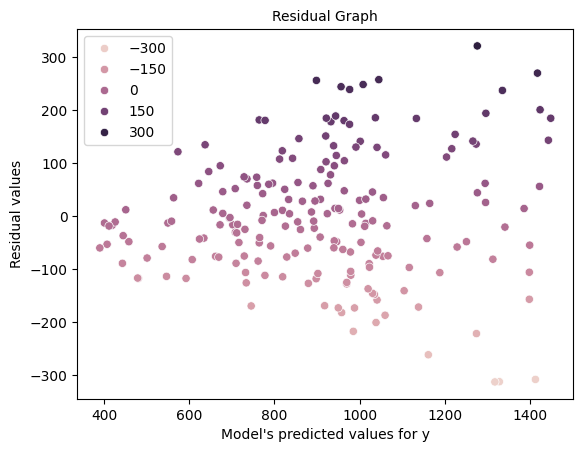

In [45]:
y_test_df_to_2D_nparray = y_test.to_numpy()
y_test_2D_to_1D_nparray = y_test_df_to_2D_nparray.ravel()

Models_prediction_values_for_y_2D_to_1D_nparray = Models_prediction_values_for_y.ravel()

Residual_value = y_test_2D_to_1D_nparray - Models_prediction_values_for_y_2D_to_1D_nparray

sns.scatterplot(x = Models_prediction_values_for_y_2D_to_1D_nparray , y = Residual_value , hue = Residual_value)
plt.title("Residual Graph" , fontsize = "10")
plt.xlabel("Model's predicted values for y")
plt.ylabel("Residual values")
plt.show()

# Step 10: Visualize the difference between the actual values and the predicted values:


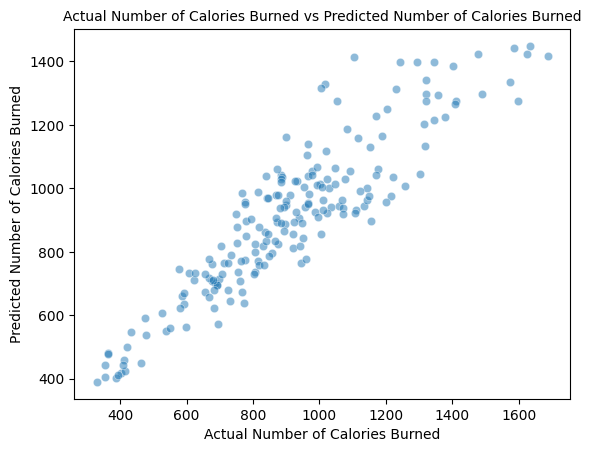

In [46]:
sns.scatterplot(x = y_test_2D_to_1D_nparray , y = Models_prediction_values_for_y_2D_to_1D_nparray , alpha = 0.5)
plt.title("Actual Number of Calories Burned vs Predicted Number of Calories Burned" , fontsize = "10")
plt.xlabel("Actual Number of Calories Burned")
plt.ylabel("Predicted Number of Calories Burned")
plt.show()

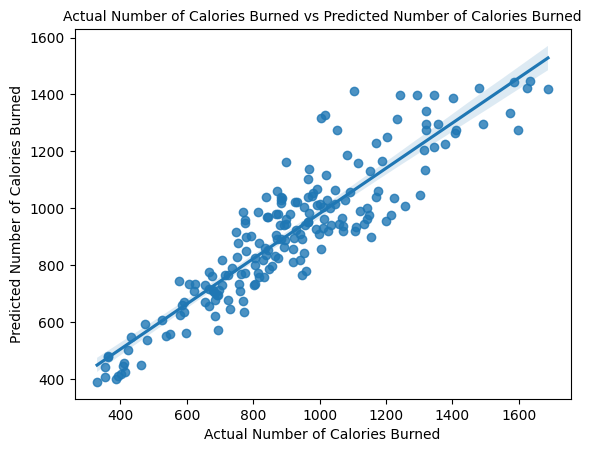

In [50]:
sns.regplot(x = y_test_2D_to_1D_nparray , y = Models_prediction_values_for_y_2D_to_1D_nparray)
plt.title("Actual Number of Calories Burned vs Predicted Number of Calories Burned" , fontsize = "10")
plt.xlabel("Actual Number of Calories Burned")
plt.ylabel("Predicted Number of Calories Burned")
plt.show()

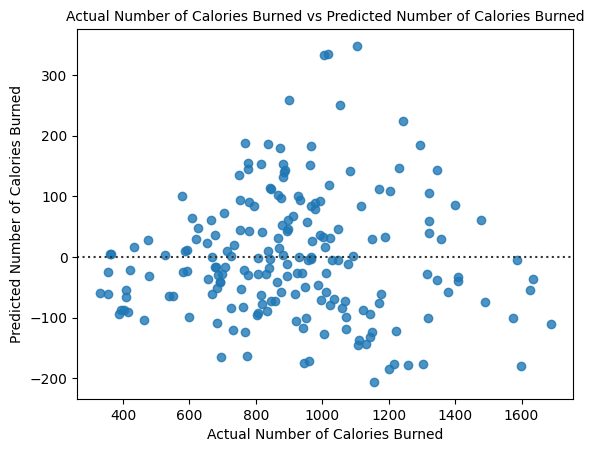

In [51]:
sns.residplot(x = y_test_2D_to_1D_nparray , y = Models_prediction_values_for_y_2D_to_1D_nparray)
plt.title("Actual Number of Calories Burned vs Predicted Number of Calories Burned" , fontsize = "10")
plt.xlabel("Actual Number of Calories Burned")
plt.ylabel("Predicted Number of Calories Burned")
plt.show()

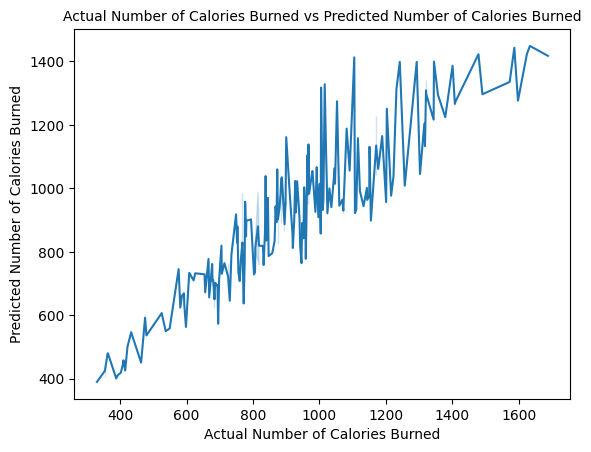

In [52]:
sns.lineplot(x = y_test_2D_to_1D_nparray , y = Models_prediction_values_for_y_2D_to_1D_nparray)
plt.title("Actual Number of Calories Burned vs Predicted Number of Calories Burned" , fontsize = "10")
plt.xlabel("Actual Number of Calories Burned")
plt.ylabel("Predicted Number of Calories Burned")
plt.show()